# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from itertools import permutations
import requests
from tqdm import tqdm
import os
import pickle
import glob

# Explore all datasets

## METR-LA

In [2]:
df = pd.read_hdf('data/METRLA/metr-la.h5')
df.head()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [4]:
df.tail()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,0.0,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,0.0,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,0.0,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,0.0,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000
2012-06-27 23:55:00,65.111111,66.888889,66.777778,61.222222,0.0,49.555556,65.777778,65.111111,63.000000,61.666667,...,56.000000,67.444444,64.888889,60.888889,64.222222,66.444444,68.444444,63.555556,68.666667,61.777778


In [5]:
df.describe()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
count,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,...,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000
mean,54.631359,60.452789,60.726120,49.524287,46.079798,50.952003,54.471684,57.255095,56.068044,52.871841,...,37.803342,58.156679,51.217523,59.795754,59.329923,56.915083,62.484679,54.697381,58.920210,51.197504
std,22.619199,15.970239,18.313353,15.843261,19.350345,16.681760,17.984761,18.751065,18.240361,23.343805,...,13.525743,20.690411,22.224997,16.126225,19.849950,18.260438,16.959238,16.303651,19.080474,21.239354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.364583,63.000000,65.444444,50.333333,34.666667,49.555556,55.750000,61.000000,58.222222,43.428571,...,30.444444,64.111111,53.444444,61.714286,63.666667,60.222222,65.888889,50.125000,62.888889,54.125000
50%,64.888889,65.000000,67.375000,53.875000,46.000000,56.111111,62.111111,63.333333,62.444444,65.875000,...,43.222222,67.111111,61.777778,64.875000,66.777778,63.000000,67.625000,61.125000,66.125000,62.000000
75%,66.875000,66.375000,68.444444,58.125000,64.500000,60.333333,65.000000,65.000000,64.888889,67.625000,...,46.625000,68.444444,64.375000,66.500000,68.250000,64.750000,68.625000,64.444444,67.750000,63.444444
max,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,65.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


In [7]:
total_entries = df.size
zero_entries = (df == 0).sum().sum()
percentage_zeros = (zero_entries / total_entries) * 100
percentage_zeros

8.109350825676486

## PEMS-BAY

In [9]:
df2 = pd.read_hdf('data/PEMSBAY/PEMS-BAY.h5')
df2.head()

sensor_id,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9


In [10]:
df2.tail()

sensor_id,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-06-30 23:35:00,70.9,66.3,68.4,61.0,61.8,66.9,66.0,67.4,65.4,69.3,...,64.6,66.8,64.7,61.1,68.4,61.4,70.5,68.2,71.6,66.2
2017-06-30 23:40:00,71.3,66.6,68.7,60.9,62.0,66.2,66.5,68.2,64.9,69.1,...,65.1,67.3,64.8,60.8,69.8,62.2,69.4,68.6,71.6,68.4
2017-06-30 23:45:00,71.4,66.9,68.1,61.1,62.0,66.7,65.8,68.2,64.2,69.1,...,64.9,66.5,64.6,61.3,69.5,63.8,70.6,68.4,71.6,66.6
2017-06-30 23:50:00,72.2,66.5,68.0,61.1,62.5,65.8,67.1,68.3,64.0,67.3,...,64.1,65.9,64.8,61.3,69.6,64.2,70.2,68.7,71.6,68.4
2017-06-30 23:55:00,71.5,66.2,68.4,61.5,62.8,66.1,67.7,68.4,64.9,68.0,...,64.3,66.5,64.8,60.9,70.9,63.4,70.3,68.7,71.6,68.0


In [11]:
df2.describe()

sensor_id,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
count,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,...,52116.000000,52116.00000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000,52116.000000
mean,67.568557,59.019079,59.138577,62.137407,61.195873,63.314788,58.777483,63.565579,62.069533,57.726957,...,65.795827,63.61541,63.815680,60.647717,66.148728,57.203082,67.566198,64.604361,67.351650,64.328245
std,8.119154,13.250178,11.658612,8.617881,11.019177,11.159615,13.078931,8.434674,10.557263,18.113331,...,5.645500,6.42068,8.381049,4.622528,4.511122,10.932359,5.992427,4.753887,7.060815,8.455986
min,0.000000,11.000000,3.400000,0.000000,7.400000,0.000000,0.000000,0.000000,0.000000,5.300000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.300000,62.200000,55.800000,59.400000,57.500000,65.000000,58.400000,64.200000,63.300000,61.300000,...,64.700000,63.80000,63.700000,60.000000,63.700000,57.800000,67.200000,62.900000,67.000000,64.600000
50%,70.300000,64.000000,62.700000,66.200000,63.500000,66.500000,63.700000,66.400000,65.500000,65.500000,...,67.500000,65.10000,66.100000,61.600000,66.700000,60.900000,69.400000,66.100000,69.000000,66.400000
75%,71.300000,65.100000,66.600000,67.700000,69.500000,67.500000,66.300000,67.500000,67.000000,67.400000,...,68.500000,66.40000,67.300000,62.600000,69.500000,62.600000,70.400000,67.900000,70.400000,67.700000
max,80.400000,71.600000,77.700000,76.900000,78.900000,78.700000,78.200000,80.000000,75.400000,72.300000,...,78.600000,73.70000,78.900000,69.900000,76.800000,79.900000,79.900000,72.500000,80.400000,74.300000


In [19]:
total_entries = df2.size
zero_entries = (df2 == 0).sum().sum()
percentage_zeros = (zero_entries / total_entries) * 100
percentage_zeros

0.003075978438630983

## HAUGE

In [40]:
df3 = pd.read_hdf('data/Hauge/hague_comp_filled.h5', sep=';')

In [41]:
df3.head()

,K502-S1,K502-111,K502-051,K263-081,K263-N1,K263-031,K263-S1,K503-N1,K503-07_1,K503-S1,...,K074-052,K414-N1,K414-N2,K414-S1,K414-S2,K415-021,K415-081,K250-N1,K250-S1,K250-N2
2018-01-01 00:00:00,4.0,1.0,1.0,1.0,3.0,1.0,1.000000,4.0,1.0,1.0,...,3.0,1.0,2.0,3.0,1.0,2.0,4.0,1.0,2.333333,2.0
2018-01-01 00:05:00,1.0,1.0,1.0,1.0,3.0,1.0,1.000000,4.0,1.0,1.0,...,2.0,1.0,2.0,3.0,1.0,2.0,4.0,1.0,2.333333,2.0
2018-01-01 00:10:00,1.5,1.0,1.0,1.0,1.0,1.0,1.500000,1.0,1.0,1.0,...,2.0,1.0,7.0,2.0,1.0,1.5,2.5,1.0,2.000000,2.0
2018-01-01 00:15:00,2.5,1.0,1.0,1.0,4.0,1.0,1.583333,3.0,1.0,2.0,...,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.5,2.000000,2.0
2018-01-01 00:20:00,4.0,2.0,3.0,1.0,1.0,3.0,1.666667,1.5,1.0,3.0,...,4.0,1.0,3.5,1.5,1.0,3.0,3.0,2.0,2.000000,2.0


In [22]:
df3.tail()

,K502-S1,K502-111,K502-051,K263-081,K263-N1,K263-031,K263-S1,K503-N1,K503-07_1,K503-S1,...,K074-052,K414-N1,K414-N2,K414-S1,K414-S2,K415-021,K415-081,K250-N1,K250-S1,K250-N2
2019-12-31 23:35:00,1.0,1.0,3.0,1.0,4.0,1.0,3.0,2.0,1.0,2.0,...,5.0,2.0,8.0,1.0,0.0,10.0,1.0,12.0,4.0,0.0
2019-12-31 23:40:00,9.0,1.5,1.0,2.0,6.0,1.0,2.0,4.0,3.0,2.0,...,2.0,4.0,5.0,2.0,1.0,8.0,4.0,7.0,3.0,0.0
2019-12-31 23:45:00,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,4.0,3.0,6.0,7.0,3.0,7.0,7.0,11.0,9.0,0.0
2019-12-31 23:50:00,3.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,...,1.0,4.0,4.0,1.0,7.0,7.0,4.0,7.0,4.0,4.0
2019-12-31 23:55:00,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0,...,3.0,4.0,8.0,4.0,4.0,7.0,6.0,5.0,5.0,3.0


In [26]:
df3.describe()

,K502-S1,K502-111,K502-051,K263-081,K263-N1,K263-031,K263-S1,K503-N1,K503-07_1,K503-S1,...,K074-052,K414-N1,K414-N2,K414-S1,K414-S2,K415-021,K415-081,K250-N1,K250-S1,K250-N2
count,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,...,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000
mean,25.236620,12.110011,14.205948,5.129366,20.641252,5.416760,24.636516,20.226028,13.082478,19.838002,...,7.369044,9.670660,20.524272,7.633918,7.596621,18.812483,13.862488,27.304525,25.420448,7.932205
std,19.405416,9.078076,10.529551,3.905994,14.862389,6.103183,18.660723,17.735410,9.859049,17.421102,...,6.184567,10.671182,17.368232,6.524046,7.511396,16.719564,11.438625,23.379308,19.393893,7.252116
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,3.000000,1.750000,7.000000,1.000000,6.000000,4.000000,5.000000,3.000000,...,2.000000,2.000000,5.000000,2.000000,2.000000,5.000000,4.000000,7.000000,8.000000,1.000000
50%,25.000000,11.000000,14.000000,4.000000,20.000000,3.000000,23.000000,18.000000,12.000000,17.000000,...,6.000000,7.000000,17.000000,6.000000,5.000000,15.000000,11.000000,21.000000,22.000000,7.000000
75%,39.000000,19.000000,23.000000,8.000000,32.000000,8.000000,39.000000,33.000000,20.000000,33.000000,...,11.000000,14.000000,32.000000,12.000000,11.000000,28.000000,21.000000,44.000000,39.000000,13.000000
max,258.000000,96.000000,89.000000,38.000000,89.000000,148.000000,112.000000,231.000000,91.000000,102.000000,...,46.000000,91.000000,121.000000,65.000000,67.000000,109.000000,105.000000,154.000000,133.000000,113.000000


In [25]:
total_entries = df3.size
zero_entries = (df3 == 0).sum().sum()
percentage_zeros = (zero_entries / total_entries) * 100
percentage_zeros

4.043254881915959

In [27]:
df4 = pd.read_hdf('data/Hauge/hague_filled.h5', sep=';')

In [29]:
df4.describe()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
count,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,...,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000,209027.000000
mean,10.201892,7.369044,14.019154,21.918629,21.118975,2.845001,21.916782,23.547300,6.728244,7.657631,...,8.204991,11.878595,6.306285,5.852868,14.671818,13.875118,11.966330,6.460515,20.881299,15.376109
std,6.955736,6.184567,9.458659,12.454072,14.422103,1.977640,13.704861,16.872028,4.515344,8.109553,...,6.339753,8.130951,5.251719,4.826105,11.959692,11.562566,12.530202,5.632539,14.775188,13.395197
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,5.000000,11.000000,8.000000,1.000000,9.000000,7.000000,3.000000,3.000000,...,2.000000,4.000000,1.800000,1.838608,3.000000,2.000000,1.000000,2.000000,7.000000,2.500000
50%,10.000000,6.000000,14.000000,22.000000,20.000000,2.000000,22.000000,22.000000,6.000000,7.000000,...,7.000000,12.000000,5.000000,5.000000,13.000000,12.000000,8.000000,5.000000,20.000000,13.000000
75%,15.000000,11.000000,21.000000,31.000000,32.000000,4.000000,32.000000,37.000000,10.000000,11.000000,...,13.000000,18.000000,9.750878,9.000000,23.000000,21.000000,19.000000,9.000000,32.000000,24.000000
max,67.000000,46.000000,65.000000,72.000000,81.000000,25.000000,66.000000,85.000000,43.000000,2531.000000,...,104.000000,94.000000,89.000000,114.000000,114.000000,100.000000,83.000000,77.000000,87.000000,118.000000


Original data for one specific intersection. Legacy code below

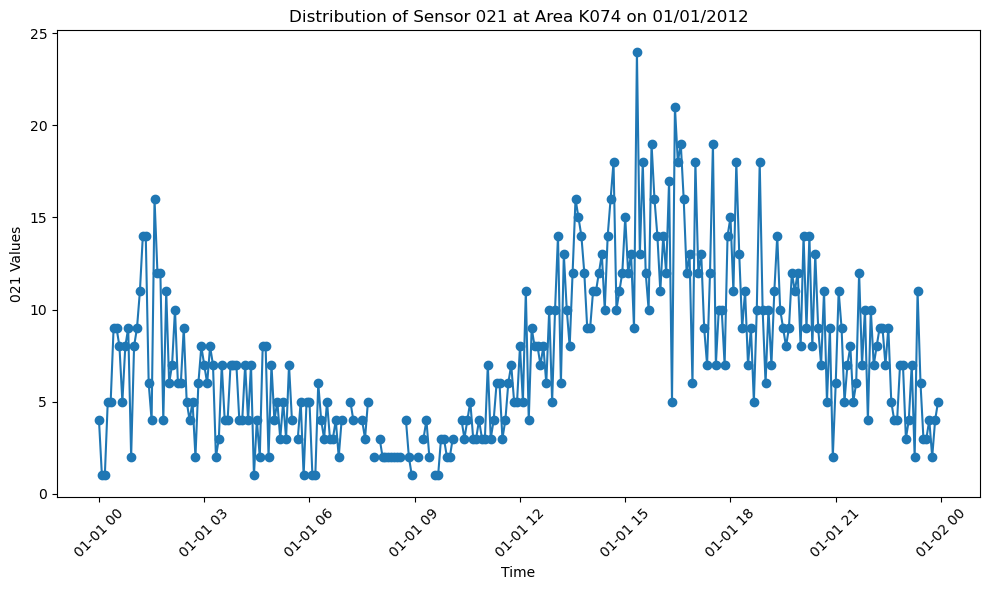

In [19]:
df3 = df3.iloc[:-1]
df3['K074'] = pd.to_datetime(df3['K074'])
df3_first_day = df3[df3['K074'].dt.date == df3['K074'].dt.date.min()]

# Plot the distribution of values in column '021' over time
plt.figure(figsize=(10, 6))
plt.plot(df3_first_day['K074'], df3_first_day['021'], marker='o')
plt.title('Distribution of Sensor 021 at Area K074 on 01/01/2012')
plt.xlabel('Time')
plt.ylabel('021 Values')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [16]:
df4 = pd.read_csv('data/Hauge/K415/K415-2018-1-.csv', sep=';')
df4 = df4.drop(df4.index[-1])
df4.columns

In [19]:
df4.describe()

,021,022,023,024,025opti,S021nos,S022nos,031,032,033,...,lb4,lb5,lb6,lb7,lb8,lb9,lb10,daccrossok,K341,Unnamed: 48
count,8431.000000,8292.000000,8323.000000,8291.000000,12.0,0.0,0.0,8076.000000,8055.000000,8053.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.000000,0.0
mean,16.064880,11.680777,15.020065,15.194669,1.0,NaN,NaN,10.927068,9.028554,10.737117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110092,NaN
std,13.032542,8.505981,12.666624,13.050758,0.0,NaN,NaN,7.034739,5.385297,6.939545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355067,NaN
min,1.000000,1.000000,1.000000,1.000000,1.0,NaN,NaN,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,5.000000,4.000000,4.000000,4.000000,1.0,NaN,NaN,5.000000,4.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,13.000000,10.000000,12.000000,12.000000,1.0,NaN,NaN,11.000000,9.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,25.000000,18.000000,23.000000,23.000000,1.0,NaN,NaN,16.000000,13.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
max,74.000000,48.000000,69.000000,81.000000,1.0,NaN,NaN,40.000000,28.000000,37.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN


## Check adjacency matrix
### METR-LA

In [45]:
import pickle

file_path = 'data/METRLA/adj_mx.pkl'

with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')

print(len(adj_mx))
print(adj_mx[0])
print(len(adj_mx[0]))
print(adj_mx[1])


3
['773869', '767541', '767542', '717447', '717446', '717445', '773062', '767620', '737529', '717816', '765604', '767471', '716339', '773906', '765273', '716331', '771667', '716337', '769953', '769402', '769403', '769819', '769405', '716941', '717578', '716960', '717804', '767572', '767573', '773012', '773013', '764424', '769388', '716328', '717819', '769941', '760987', '718204', '718045', '769418', '768066', '772140', '773927', '760024', '774012', '774011', '767609', '769359', '760650', '716956', '769831', '761604', '717495', '716554', '773953', '767470', '716955', '764949', '773954', '767366', '769444', '773939', '774067', '769443', '767750', '767751', '767610', '773880', '764766', '717497', '717490', '717491', '717492', '717493', '765176', '717498', '717499', '765171', '718064', '718066', '765164', '769431', '769430', '717610', '767053', '767621', '772596', '772597', '767350', '767351', '716571', '773023', '767585', '773024', '717483', '718379', '717481', '717480', '717486', '764120

In [33]:
len(adj_mx[2][0])

207

In [46]:
adj_mx[2]

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.3909554, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.7174379, 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]], dtype=float32)

# Calculate new distance

## Test on two points

In [25]:
# osrm_server = "http://router.project-osrm.org"
osrm_server = "http://127.0.0.1:5001"
x1 = '4.229222222222222'
y1 = '52.05197222222222'

x2 = '4.228972222222223'
y2 = '52.05175'


request_url = f"{osrm_server}/route/v1/driving/{x1},{y1};{x2},{y2}?overview=false"
print(request_url)
# Making the request to the OSRM API
response = requests.get(request_url)
route_data = response.json()
print(route_data)

# Parsing the distance from the response
# Note: Make sure to handle any errors or unexpected response formats in a real application
if route_data['code'] == 'Ok':
    cost = route_data['routes'][0]['distance']  # Distance in meters
    print(f"The distance between the two points is {cost} meters")

http://127.0.0.1:5001/route/v1/driving/4.229222222222222,52.05197222222222;4.228972222222223,52.05175?overview=false
{'code': 'Ok', 'routes': [{'legs': [{'steps': [], 'summary': '', 'weight': 5.3, 'duration': 5.3, 'distance': 37.6}], 'weight_name': 'routability', 'weight': 5.3, 'duration': 5.3, 'distance': 37.6}], 'waypoints': [{'hint': '4BUAgP___38AAAAADAAAALMBAAAAAAAAAAAAAFkCUkFlyuZDAAAAAAAAAAAMAAAAswEAAAAAAAAbAQAAWIhAAP8_GgNmiEAABEAaAwkAzwnRFNYw', 'distance': 1.10945794, 'name': 'Ockenburghstraat', 'location': [4.229208, 52.051967]}, {'hint': 'UhUAgHahAIAGAAAAAwAAAA8AAABPAAAADijwQItgIkBMCohBpeiCQgYAAAADAAAADwAAAE8AAAAbAQAAVIdAAEo_GgNsh0AAJj8aAwEAfw_RFNYw', 'distance': 4.33049241, 'name': 'Loosduinse Hoofdstraat', 'location': [4.228948, 52.051786]}]}
The distance between the two points is 37.6 meters


## Hague

In [26]:
def read_sensors_and_group_by_trajectory(csv_file_path):
    trajectory_groups = {'T1N': [], 'T1S': [], 'T2N': [], 'T2S': []}
    with open(csv_file_path, mode='r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            trajectories = row['trajectory'].split('+')
            for trajectory in trajectories:
                trajectory_groups[trajectory].append(row)
    return trajectory_groups

def calculate_distances_osrm_grouped(sensors_grouped):
    # osrm_server = "http://router.project-osrm.org"
    osrm_server = "http://127.0.0.1:5001"
    results = []

    for trajectory, sensors in sensors_grouped.items():
        # Prepare the combinations and wrap it with tqdm for the progress bar
        sensor_pairs = list(permutations(sensors, 2))
        for sensor_a, sensor_b in tqdm(sensor_pairs, desc=f"Calculating distances for {trajectory}"):
            request_url = f"{osrm_server}/route/v1/driving/{sensor_a['longitude']},{sensor_a['latitude']};{sensor_b['longitude']},{sensor_b['latitude']}?overview=false"
            
            response = requests.get(request_url)
            route_data = response.json()
            
            if route_data['code'] == 'Ok':
                cost = route_data['routes'][0]['distance']  # Distance in meters
            else:
                cost = float('inf')  # Indicate failure
            
            results.append({
                'trajectory': trajectory,
                'from': sensor_a['sensor_id'],
                'to': sensor_b['sensor_id'],
                'cost': cost
            })
            # print(f"From {sensor_a['sensor_id']} to {sensor_b['sensor_id']} cost: {cost}")

    return results


In [29]:
csv_file_path = 'data/Hauge/location_std.csv'
sensors_grouped = read_sensors_and_group_by_trajectory(csv_file_path)
results = calculate_distances_osrm_grouped(sensors_grouped)


Calculating distances for T1N:   0%|          | 0/1122 [00:00<?, ?it/s]

Calculating distances for T2S: 100%|██████████| 2352/2352 [00:06<00:00, 366.64it/s]


Save distances betwee each sensor on the same trajectory into a csv file

In [30]:
with open('data/Hauge/distances.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['trajectory', 'from', 'to', 'cost'])
    writer.writeheader()
    writer.writerows(results)

## METR-LA

In [2]:
def read_sensors(csv_file_path):
    sensors = []
    with open(csv_file_path, mode='r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            sensors.append(row)
    return sensors

In [ ]:
def calculate_distances_osrm(sensors):
    results = []
    osrm_server = "http://router.project-osrm.org"  # Example server, replace with your own if you have one
    # osrm_server = "http://127.0.0.1:5001"
    for sensor_a in tqdm(sensors, desc="Calculating distances"):
        for sensor_b in sensors:
            if sensor_a['sensor_id'] == sensor_b['sensor_id']:
                cost = 0.0  # Cost is zero when it's the same sensor
            else:
                # Constructing the request URL
                request_url = f"{osrm_server}/route/v1/driving/{sensor_a['longitude']},{sensor_a['latitude']};{sensor_b['longitude']},{sensor_b['latitude']}?overview=false"
                print(request_url)
                # Making the request to the OSRM API
                response = requests.get(request_url)
                route_data = response.json()
                
                # Parsing the distance from the response
                # Note: Make sure to handle any errors or unexpected response formats in a real application
                if route_data['code'] == 'Ok':
                    cost = route_data['routes'][0]['distance']  # Distance in meters
                else:
                    cost = float('inf')  # An arbitrary large number to denote failure to get distance
                # print(cost)
            results.append({'from': sensor_a['sensor_id'], 'to': sensor_b['sensor_id'], 'cost': cost})
            # print(results)
    return results

In [10]:
csv_file_path = 'data/METRLA/graph_sensor_locations.csv'
output_csv_file_path = 'data/METRLA/distances_la_route.csv'

sensors = read_sensors(csv_file_path)
distance_results = calculate_distances_osrm(sensors)

In [9]:
with open(output_csv_file_path, mode='w', newline='') as csvfile:
    fieldnames = ['from', 'to', 'cost']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for result in distance_results:
        writer.writerow(result)

print(f"Distances saved to {output_csv_file_path}")

Distances saved to data/METRLA/distances_la_route.csv


## PeMS-BAY

In [ ]:
csv_file_path = 'data/PEMSBAY/graph_sensor_locations_bay.csv'
output_csv_file_path = 'data/PEMSBAY/distances_bay_route.csv'
sensors = read_sensors(csv_file_path)
distance_results = calculate_distances_osrm(sensors)

In [ ]:
with open(output_csv_file_path, mode='w', newline='') as csvfile:
    fieldnames = ['from', 'to', 'cost']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for result in distance_results:
        writer.writerow(result)

print(f"Distances saved to {output_csv_file_path}")

# Create new adjacency matrix

## METR-LA

In [25]:
distances_df = pd.read_csv('data/METRLA/distances_la_route.csv')
df = pd.read_hdf('data/METRLA/metr-la.h5')
df.head()

In [24]:
def get_adjacency_matrix(dist_mx_array, normalized_k=0.1):
    # Calculate the standard deviation as theta for normalization
    distances = dist_mx_array[~np.isinf(dist_mx_array)].flatten()
    std = distances.std()
    adj_mx_array = np.exp(-np.square(dist_mx_array / std))
    
    # Set entries below a threshold to zero for sparsity
    adj_mx_array[adj_mx_array < normalized_k] = 0
    return adj_mx_array

In [60]:
sensor_ids = df.columns.astype(str).tolist()

# Efficiently convert sensor IDs to index for quick lookup (now all as strings)
sensor_id_to_index = {str(sensor_id): index for index, sensor_id in enumerate(sensor_ids)}

# Initialize an empty distance matrix
num_sensors = len(sensor_ids)
dist_mx_array = np.full((num_sensors, num_sensors), np.inf)

# Make sure 'from' and 'to' in distances_df are also strings
distances_df['from'] = distances_df['from'].astype(str)
distances_df['to'] = distances_df['to'].astype(str)


In [61]:
# Populate the distance matrix with the data from distances_df
for _, row in distances_df.iterrows():
    from_sensor = row['from']
    to_sensor = row['to']
    if from_sensor in sensor_id_to_index and to_sensor in sensor_id_to_index:
        i = sensor_id_to_index[from_sensor]
        j = sensor_id_to_index[to_sensor]
        dist_mx_array[i, j] = row['cost']

# Replace the diagonal with zeros since the distance from a sensor to itself is zero
np.fill_diagonal(dist_mx_array, 0)

In [62]:
adj_mx_array = get_adjacency_matrix(dist_mx_array).astype(np.float32)
adj_mx = [sensor_ids, sensor_id_to_index, adj_mx_array]

In [63]:
adj_mx[2]

array([[1.        , 0.14388524, 0.1433578 , ..., 0.        , 0.34449434,
        0.27822873],
       [0.        , 1.        , 0.92753   , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.97311145, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12031321,
        0.        ],
       [0.32921156, 0.        , 0.        , ..., 0.28058538, 1.        ,
        0.1591485 ],
       [0.        , 0.17780617, 0.        , ..., 0.        , 0.365523  ,
        1.        ]], dtype=float32)

In [64]:
directory = 'data/METRLA'
file_name = 'adj_mx_new.pkl'
file_path = os.path.join(directory, file_name)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the adj_mx to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(adj_mx, f)

## PeMS-BAY

In [23]:
# Load distances from CSV
distances_df = pd.read_csv('data/PEMSBAY/distances_bay_route.csv')
df = pd.read_hdf('data/PEMSBAY/pems-bay.h5')

In [25]:
def get_adjacency_matrix(dist_mx_array, normalized_k=0.1):
    # Calculate the standard deviation as theta for normalization
    distances = dist_mx_array[~np.isinf(dist_mx_array)].flatten()
    std = distances.std()
    adj_mx_array = np.exp(-np.square(dist_mx_array / std))
    
    # Set entries below a threshold to zero for sparsity
    adj_mx_array[adj_mx_array < normalized_k] = 0
    return adj_mx_array

In [26]:
sensor_ids = df.columns.astype(str).tolist()

# Efficiently convert sensor IDs to index for quick lookup (now all as strings)
sensor_id_to_index = {str(sensor_id): index for index, sensor_id in enumerate(sensor_ids)}

# Initialize an empty distance matrix
num_sensors = len(sensor_ids)
dist_mx_array = np.full((num_sensors, num_sensors), np.inf)

# Make sure 'from' and 'to' in distances_df are also strings
distances_df['from'] = distances_df['from'].astype(str)
distances_df['to'] = distances_df['to'].astype(str)


In [27]:
# Populate the distance matrix with the data from distances_df
for _, row in distances_df.iterrows():
    from_sensor = row['from']
    to_sensor = row['to']
    if from_sensor in sensor_id_to_index and to_sensor in sensor_id_to_index:
        i = sensor_id_to_index[from_sensor]
        j = sensor_id_to_index[to_sensor]
        dist_mx_array[i, j] = row['cost']

# Replace the diagonal with zeros since the distance from a sensor to itself is zero
np.fill_diagonal(dist_mx_array, 0)

In [28]:
adj_mx_array = get_adjacency_matrix(dist_mx_array).astype(np.float32)

# Construct the adj_mx list as specified with the updated adj_mx_array
adj_mx = [sensor_ids, sensor_id_to_index, adj_mx_array]

In [37]:
adj_mx[2]

array([[1.        , 0.        , 0.9753683 , ..., 0.1455361 , 0.108174  ,
        0.2997445 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46347445, 0.        , 1.        , ..., 0.3394872 , 0.37006766,
        0.29443577],
       ...,
       [0.3015327 , 0.        , 0.28416768, ..., 1.        , 0.9894411 ,
        0.8761344 ],
       [0.        , 0.        , 0.        , ..., 0.4210224 , 1.        ,
        0.93433607],
       [0.10467646, 0.        , 0.12426899, ..., 0.        , 0.11791267,
        1.        ]], dtype=float32)

In [38]:
directory = 'data/PEMSBAY'
file_name = 'adj_mx_new.pkl'
file_path = os.path.join(directory, file_name)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the adj_mx to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(adj_mx, f)

# Cleansing Hague data

K159-2018-7-1

In [17]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/Hauge/K159/K159-2018-7-1.csv", delimiter=';')

# Convert the first column to datetime, assuming the format "day-month-year hours:minutes"
# Note: Adjust the 'dayfirst=True' parameter if your date format varies
first_column_name = df.columns[0]
df[first_column_name] = pd.to_datetime(df[first_column_name], dayfirst=True)

# Format the date in the desired output format "year-month-day hours:minutes"
df[first_column_name] = df[first_column_name].dt.strftime('%Y-%m-%d %H:%M')

In [15]:
df.to_csv("K159-2018-7-1_modified.csv", sep=';', index=False)

K159-2018-7-2

In [18]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/Hauge/K159/K159-2018-7-2.csv", delimiter=';')
df.loc[:len(df)-2, first_column_name] = pd.to_datetime(df[first_column_name].iloc[:-1], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M')

In [21]:
df.to_csv("K159-2018-7-2_modified.csv", sep=';', index=False)

K182-2019-9-1

In [25]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/Hauge/K182/K182-2019-9-1.csv", delimiter=';')

# Convert the first column to datetime, assuming the format "day-month-year hours:minutes"
# Note: Adjust the 'dayfirst=True' parameter if your date format varies
first_column_name = df.columns[0]
df[first_column_name] = pd.to_datetime(df[first_column_name], dayfirst=True)

# Format the date in the desired output format "year-month-day hours:minutes"
df[first_column_name] = df[first_column_name].dt.strftime('%Y-%m-%d %H:%M')

In [26]:
df.to_csv("K182-2019-9-1_modified.csv", sep=';', index=False)

K182-2019-9-2

In [27]:
df = pd.read_csv("data/Hauge/K182/K182-2019-9-2.csv", delimiter=';')
df.loc[:len(df)-2, first_column_name] = pd.to_datetime(df[first_column_name].iloc[:-1], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M')

In [28]:
df.to_csv("K182-2019-9-2_modified.csv", sep=';', index=False)

# Create adjacency matrix HAUGE

In [1]:
sensors_dict = {
        'K502': ['082', '051', '111', '081'],
        'K504': ['08_2', '12_1', '02_1', '08_1', '11_1', '09_1', '12_2', '02_2', '04_2', '05_1', '04_1', '05_2'],
        'K503': ['02_1', '03_1', '11_1', '07_1', '09_1', '05_1', '05_2', '11_2'],
        'K263': ['052', '041', '061', '112', '051', '031', '111', '081'],
        'K556': ['08_2', '02_1', '08_1', '11_1', '02_2', '10_1', '05_1', '04_1'],
        'K557': ['08_2', '02_1', '08_1', '11_1', '02_2', '10_1'],
        'K559': ['08_2', '12_1', '02_1', '08_1', '02_2', '10_1'],
        'K561': ['08_2', '01_1', '02_1', '08_1', '09_1', '02_2', '10_1', '05_1', '05_2', '06_1'],
        'K198': ['052', '061', '112', '021', '051', '111', '081'],
        'K704': ['12_1', '02_1', '69_1', '11_1', '65_2', '11_3', '65_1', '11_2'],
        'K702': ['03_1', '11_1', '05_1', '04_1', '05_2', '11_2'],
        'K703': ['08_2', '02_1', '08_1', '03_1', '09_1', '05_1', '05_2'],
        # 'K159': ['021', '051', '713', '111', '081'],
        'K159': ['021', '051', '111', '081'],
        'K182': ['621', '682', '681', '622', '121'],
        'K183': ['082', '021', '051', '022', '111', '081'],
        'K128': ['131', '161', '061', '112', '162', '062'],
        # 'K139': ['101', '082', '021', '022', '121', '081'],
        # 'K104': ['082', '021', '051', '022', '111', '081'],
        'K101': ['621', '082', '051', '711', '622', '121', '081'],
        'K206': ['091', '052', '101', '082', '061', '021', '051', '022', '092', '081'],
        'K074': ['052', '051'],
        'K414': ['091', '122', '082', '051', '011', '012', '121', '092', '081'],
        'K415': ['061', '021', '081', '041'],
        'K250': ['091', '101', '102', '021', '022', '092', '081']
        }

# Base path for the sensor data
base_path = 'data/Hauge'

Identify missing timestamps

In [5]:
# Generate a complete DateTimeIndex from 2018-01-01 00:00:00 to 2019-12-31 23:55:00 with 5-minute intervals
complete_index = pd.date_range(start='2018-01-01 00:00:00', end='2019-12-31 23:55:00', freq='5T')

intersections = []
missing_timestamps_dict = {}  # Initialize a dictionary to store missing timestamps for each sensor

for sensor, codes in sensors_dict.items():
    sensor_folder_path = os.path.join(base_path, sensor)
    csv_files = glob.glob(f"{sensor_folder_path}/{sensor}-201[89]-*-*.csv")
    all_data = []
    for file in tqdm(csv_files, desc=f"Processing {sensor}"):
        # Read the CSV file
        df = pd.read_csv(file, delimiter=';', parse_dates=[0], index_col=0)
        
        # Clean the column names of quotes
        df.columns = [col.replace('"', '').replace("'", "") for col in df.columns]
        df = df[~df.index.astype(str).str.contains('totaal')]
    
        df.index.name = None
        df.index = pd.to_datetime(df.index)
        
        # Keep only the filtered columns
        df = df.loc[:, codes]
        
        # Append the DataFrame to the list
        all_data.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(all_data)

    # Sort the DataFrame by the index (date and time)
    final_df.sort_index(inplace=True)
    final_df.columns = [sensor + "-" + col for col in final_df.columns]
    final_df = final_df[final_df.index.year.isin([2018, 2019])]
    
    # Identify missing timestamps
    missing_timestamps = complete_index.difference(final_df.index)
    
    # Store the missing timestamps in the dictionary
    missing_timestamps_dict[sensor] = missing_timestamps

    # Print the first few rows to verify
    # print(final_df.head())
#     intersections.append(final_df)

# hague = pd.concat(intersections, axis=1)
# hague = hague.sort_index(axis=1)
# missing_timestamps_dict

Processing K250: 100%|██████████| 24/24 [00:19<00:00,  1.26it/s]


save the missing timestamp

In [6]:
import json

# Convert datetime objects to strings in missing_timestamps_dict
for sensor, timestamps in missing_timestamps_dict.items():
    missing_timestamps_dict[sensor] = [timestamp.isoformat() for timestamp in timestamps]

# Save missing_timestamps_dict to a JSON file
with open('missing_timestamps.json', 'w') as f:
    json.dump(missing_timestamps_dict, f, indent=4)

# The file missing_timestamps.json now contains the missing timestamps data

Prepare and generate the standardized data file

In [7]:
intersections = []

for sensor, codes in sensors_dict.items():
    sensor_folder_path = os.path.join(base_path, sensor)
    print(sensor_folder_path)

    # List all CSV files in the sensor folder for the date range 2018-01 to 2019-12
    csv_files = glob.glob(f"{sensor_folder_path}/{sensor}-201[89]-*-*.csv")
    all_data = []
    for file in csv_files:
        # Read the CSV file
        df = pd.read_csv(file, delimiter=';', parse_dates=[0], index_col=0)
        
        # Clean the column names of quotes
        df.columns = [col.replace('"', '').replace("'", "") for col in df.columns]
        df = df[~df.index.astype(str).str.contains('totaal')]
    
        df.index.name = None
        df.index = pd.to_datetime(df.index)
        # print(df.head())
        
        # Keep only the filtered columns
        df = df.loc[:, codes]
        # print(df.head())
        
        # Append the DataFrame to the list
        all_data.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(all_data)

    # Sort the DataFrame by the index (date and time)
    final_df.sort_index(inplace=True)
    final_df.columns = [sensor + "-" + col for col in final_df.columns]
    final_df = final_df[final_df.index.year.isin([2018, 2019])]
    

    # Print the first few rows to verify
    # print(final_df.head())
    non_unique_indices = final_df.index.duplicated(keep=False)
    non_unique_rows = final_df[non_unique_indices]

    if not non_unique_rows.empty:
        print(non_unique_rows)
    intersections.append(final_df)
# hague = pd.concat(intersections, axis=1)
# hague = hague.sort_index(axis=1)

# hague.head()

data/Hauge/K502
data/Hauge/K504
data/Hauge/K503
data/Hauge/K263
data/Hauge/K556
data/Hauge/K557
data/Hauge/K559
data/Hauge/K561
data/Hauge/K198
data/Hauge/K704
data/Hauge/K702
data/Hauge/K703
data/Hauge/K159
data/Hauge/K182
data/Hauge/K183
data/Hauge/K128
data/Hauge/K101
data/Hauge/K206
data/Hauge/K074
data/Hauge/K414
data/Hauge/K415
data/Hauge/K250


In [8]:
hague = pd.concat(intersections, axis=1)
hague = hague.sort_index(axis=1)

hague.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2,K704-69_1
2018-01-01 00:00:00,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,1.0,2.0,2.0,5.0,2.0,NaN,7.0,8.0,1.0,2.0,...,6.0,2.0,2.0,1.0,NaN,1.0,NaN,4.0,1.0,1.0
2018-01-01 00:10:00,1.0,NaN,3.0,12.0,5.0,NaN,8.0,6.0,3.0,4.0,...,14.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,1.0,2.0,5.0,12.0,12.0,NaN,10.0,8.0,5.0,4.0,...,14.0,1.0,4.0,1.0,NaN,NaN,1.0,5.0,2.0,NaN
2018-01-01 00:20:00,6.0,4.0,5.0,19.0,13.0,1.0,6.0,4.0,1.0,8.0,...,20.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,1.0


In [9]:
hague.to_csv("data/Hauge/hague.csv")

### Try to impute the missing values

Only select the columns with missing values < 34%

In [10]:
nan_percentage = hague.isna().mean() * 100

In [11]:
print(nan_percentage.sort_values(ascending=False)[:25])

K704-69_1    44.801389
K556-04_1    41.415224
K414-012     40.633985
K556-05_1    40.116827
K415-041     39.668560
K503-09_1    39.114086
K415-061     39.005966
K263-061     38.463452
K414-092     37.309534
K414-122     36.658901
K263-041     35.735096
K702-04_1    35.235639
K702-03_1    34.990695
K504-09_1    33.498065
K414-051     32.835949
K561-05_2    32.343669
K504-02_2    31.915494
K504-05_2    31.209365
K504-04_2    31.201711
K250-022     29.328269
K556-08_2    29.216321
K556-02_2    27.969114
K198-021     27.797844
K556-10_1    27.781100
K503-05_2    27.352926
dtype: float64


In [12]:
columns_below_34_nan = nan_percentage[nan_percentage < 34].index.tolist()

# Selecting the columns in 'hague' DataFrame where the NaN percentage is less than 34%
filtered_hague = hague[columns_below_34_nan]

Imputation based on https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/time-series-analysis/Dealing-with-missing-values/Imputing-missing-values/index.html

In [13]:
filtered_hague.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
2018-01-01 00:00:00,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,1.0,2.0,2.0,5.0,2.0,NaN,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,NaN,1.0,NaN,4.0,1.0
2018-01-01 00:10:00,1.0,NaN,3.0,12.0,5.0,NaN,8.0,6.0,3.0,4.0,...,3.0,14.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,1.0,2.0,5.0,12.0,12.0,NaN,10.0,8.0,5.0,4.0,...,7.0,14.0,1.0,4.0,1.0,NaN,NaN,1.0,5.0,2.0
2018-01-01 00:20:00,6.0,4.0,5.0,19.0,13.0,1.0,6.0,4.0,1.0,8.0,...,8.0,20.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0


In [14]:
temp_NA_inter = filtered_hague.interpolate(method="time").copy()

In [15]:
temp_NA_inter.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
2018-01-01 00:00:00,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,1.0,2.0,2.0,5.0,2.0,NaN,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,1.5,1.0,NaN,4.0,1.0
2018-01-01 00:10:00,1.0,2.0,3.0,12.0,5.0,NaN,8.0,6.0,3.0,4.0,...,3.0,14.0,1.5,2.0,1.0,1.0,1.0,NaN,4.5,1.5
2018-01-01 00:15:00,1.0,2.0,5.0,12.0,12.0,NaN,10.0,8.0,5.0,4.0,...,7.0,14.0,1.0,4.0,1.0,1.5,1.0,1.0,5.0,2.0
2018-01-01 00:20:00,6.0,4.0,5.0,19.0,13.0,1.0,6.0,4.0,1.0,8.0,...,8.0,20.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0


In [16]:
temp_NA_bfill = temp_NA_inter.fillna(method="bfill")
temp_NA_bfill.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
2018-01-01 00:00:00,2.0,3.0,2.0,5.0,2.0,1.0,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0
2018-01-01 00:05:00,1.0,2.0,2.0,5.0,2.0,1.0,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,1.5,1.0,1.0,4.0,1.0
2018-01-01 00:10:00,1.0,2.0,3.0,12.0,5.0,1.0,8.0,6.0,3.0,4.0,...,3.0,14.0,1.5,2.0,1.0,1.0,1.0,1.0,4.5,1.5
2018-01-01 00:15:00,1.0,2.0,5.0,12.0,12.0,1.0,10.0,8.0,5.0,4.0,...,7.0,14.0,1.0,4.0,1.0,1.5,1.0,1.0,5.0,2.0
2018-01-01 00:20:00,6.0,4.0,5.0,19.0,13.0,1.0,6.0,4.0,1.0,8.0,...,8.0,20.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0


In [17]:
temp_NA_bfill.to_hdf('data/Hauge/hague_filled.h5', key='df', mode='w')

# Create new adjacency matrix Hague

In [18]:
distances_df = pd.read_csv('data/Hauge/distances.csv')
df = pd.read_hdf('data/Hauge/hague_filled.h5')
df.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
2018-01-01 00:00:00,2.0,3.0,2.0,5.0,2.0,1.0,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0
2018-01-01 00:05:00,1.0,2.0,2.0,5.0,2.0,1.0,7.0,8.0,1.0,2.0,...,2.0,6.0,2.0,2.0,1.0,1.5,1.0,1.0,4.0,1.0
2018-01-01 00:10:00,1.0,2.0,3.0,12.0,5.0,1.0,8.0,6.0,3.0,4.0,...,3.0,14.0,1.5,2.0,1.0,1.0,1.0,1.0,4.5,1.5
2018-01-01 00:15:00,1.0,2.0,5.0,12.0,12.0,1.0,10.0,8.0,5.0,4.0,...,7.0,14.0,1.0,4.0,1.0,1.5,1.0,1.0,5.0,2.0
2018-01-01 00:20:00,6.0,4.0,5.0,19.0,13.0,1.0,6.0,4.0,1.0,8.0,...,8.0,20.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0


In [19]:
sensor_ids = df.columns.astype(str).tolist()

# Efficiently convert sensor IDs to index for quick lookup (now all as strings)
sensor_id_to_index = {str(sensor_id): index for index, sensor_id in enumerate(sensor_ids)}

# Initialize an empty distance matrix
num_sensors = len(sensor_ids)
dist_mx_array = np.full((num_sensors, num_sensors), np.inf)

# Make sure 'from' and 'to' in distances_df are also strings
distances_df['from'] = distances_df['from'].astype(str)
distances_df['to'] = distances_df['to'].astype(str)

In [20]:
# Populate the distance matrix with the data from distances_df
for _, row in distances_df.iterrows():
    from_sensor = row['from']
    to_sensor = row['to']
    if from_sensor in sensor_id_to_index and to_sensor in sensor_id_to_index:
        i = sensor_id_to_index[from_sensor]
        j = sensor_id_to_index[to_sensor]
        dist_mx_array[i, j] = row['cost']

# Replace the diagonal with zeros since the distance from a sensor to itself is zero
np.fill_diagonal(dist_mx_array, 0)


In [21]:
def get_adjacency_matrix(dist_mx_array, normalized_k=0.1):
    # Calculate the standard deviation as theta for normalization
    distances = dist_mx_array[~np.isinf(dist_mx_array)].flatten()
    std = distances.std()
    adj_mx_array = np.exp(-np.square(dist_mx_array / std))
    
    # Set entries below a threshold to zero for sparsity
    adj_mx_array[adj_mx_array < normalized_k] = 0
    return adj_mx_array

In [22]:
dist_mx_array

array([[0.0000e+00,        inf, 1.2325e+03, ...,        inf, 5.4298e+03,
        5.4298e+03],
       [       inf, 0.0000e+00,        inf, ..., 5.1174e+03,        inf,
               inf],
       [9.2510e+02,        inf, 0.0000e+00, ...,        inf, 4.4431e+03,
        4.4430e+03],
       ...,
       [       inf, 6.1924e+03,        inf, ..., 0.0000e+00,        inf,
               inf],
       [5.1670e+03,        inf, 4.6488e+03, ...,        inf, 0.0000e+00,
        1.0000e-01],
       [5.1671e+03,        inf, 4.6488e+03, ...,        inf, 1.0000e-01,
        0.0000e+00]])

In [23]:
adj_mx_array = get_adjacency_matrix(dist_mx_array).astype(np.float32)

# Construct the adj_mx list as specified with the updated adj_mx_array
adj_mx = [sensor_ids, sensor_id_to_index, adj_mx_array]

In [24]:
adj_mx[2][0]

array([1.        , 0.        , 0.6670722 , 0.68415076, 0.68471646,
       0.7538739 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1358642 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7614155 ,
       0.7617027 , 0.        , 0.7242174 , 0.7242174 , 0.7244298 ,
       0.72455716, 0.        , 0.        , 0.        , 0.16591729,
       0.16594024, 0.16591729, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5667709 , 0.46512735, 0.        , 0.        , 0.47613758,
       0.        , 0.        , 0.34837127, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
# Construct the file path
directory = 'data/Hauge'
file_name = 'adj_mx.pkl'
file_path = os.path.join(directory, file_name)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the adj_mx to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(adj_mx, f)

# Create a smaller size of the original data

In [26]:
import pandas as pd
df = pd.read_hdf('data/Hauge/hague_filled.h5')

In [27]:
total_rows = len(df)

# Calculate indices for 12.5th and 87.5th percentiles
start_index = int(total_rows * 0.125)
end_index = int(total_rows * 0.875)

# Select the middle 75% of the rows
middle_75_df = df.iloc[start_index:end_index]
middle_75_df.head()

,K074-051,K074-052,K101-051,K101-081,K101-082,K101-121,K101-621,K101-622,K101-711,K128-061,...,K703-08_1,K703-08_2,K703-09_1,K704-02_1,K704-11_1,K704-11_2,K704-11_3,K704-12_1,K704-65_1,K704-65_2
2018-04-01 18:50:00,12.0,5.0,10.0,29.0,24.0,4.0,28.0,27.0,8.0,9.0,...,12.204178,6.806965,6.801990,4.0,13.0,19.0,9.0,8.0,21.0,11.0
2018-04-01 18:55:00,9.0,1.0,7.0,32.0,24.0,2.0,25.0,20.0,10.0,10.0,...,12.202686,6.803483,6.800995,5.0,23.0,14.0,10.0,7.0,33.0,14.0
2018-04-01 19:00:00,12.0,6.0,10.0,34.0,20.0,4.0,35.0,28.0,12.0,6.0,...,12.201194,6.800000,6.800000,6.0,8.0,20.0,14.0,2.0,24.0,11.0
2018-04-01 19:05:00,8.0,4.0,7.0,30.0,25.0,3.0,24.0,20.0,10.0,9.0,...,12.199702,6.796517,6.799005,8.0,13.0,17.0,11.0,2.0,21.0,9.0
2018-04-01 19:10:00,9.0,2.0,6.0,28.0,22.0,1.0,36.0,25.0,10.0,8.0,...,12.198209,6.793035,6.798010,7.0,9.0,12.0,12.0,6.0,17.0,12.0


In [28]:
middle_75_df.to_hdf('data/Hauge/hague_filled_75.h5', key='df', mode='w')

# Validate

In [29]:
import pickle

# file_path = 'data/METRLA/adj_mx_new.pkl'
file_path = 'data/Hauge/adj_mx.pkl'

with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')

print(len(adj_mx))
print(adj_mx[0])
print(len(adj_mx[0]))
print(adj_mx[1])

3
['K074-051', 'K074-052', 'K101-051', 'K101-081', 'K101-082', 'K101-121', 'K101-621', 'K101-622', 'K101-711', 'K128-061', 'K128-062', 'K128-112', 'K128-131', 'K128-161', 'K128-162', 'K159-021', 'K159-051', 'K159-081', 'K159-111', 'K182-121', 'K182-621', 'K182-622', 'K182-681', 'K182-682', 'K183-021', 'K183-022', 'K183-051', 'K183-081', 'K183-082', 'K183-111', 'K198-021', 'K198-051', 'K198-052', 'K198-061', 'K198-081', 'K198-111', 'K198-112', 'K206-021', 'K206-022', 'K206-051', 'K206-052', 'K206-061', 'K206-081', 'K206-082', 'K206-091', 'K206-092', 'K206-101', 'K250-021', 'K250-022', 'K250-081', 'K250-091', 'K250-092', 'K250-101', 'K250-102', 'K263-031', 'K263-051', 'K263-052', 'K263-081', 'K263-111', 'K263-112', 'K414-011', 'K414-051', 'K414-081', 'K414-082', 'K414-091', 'K414-121', 'K415-021', 'K415-081', 'K502-051', 'K502-081', 'K502-082', 'K502-111', 'K503-02_1', 'K503-03_1', 'K503-05_1', 'K503-05_2', 'K503-07_1', 'K503-11_1', 'K503-11_2', 'K504-02_1', 'K504-02_2', 'K504-04_1', 'K5

In [30]:
adj_mx[2]

array([[1.        , 0.        , 0.6670722 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79605305, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]], dtype=float32)

In [31]:
adj_mx[2].T

array([[1.        , 0.        , 0.79605305, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6670722 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]], dtype=float32)

# Transform Hauge to a compressed sensor datasets

In [30]:
file_path = 'data/Hauge/Hague_comp_sensor_ref.xlsx'
df1 = pd.read_excel(file_path)
df2 = pd.read_csv('data/Hauge/hague.csv', index_col=0)

In [31]:
def process_dataframes(df1, df2):
    # New dataframe to hold results
    df3 = pd.DataFrame()
    
    # Iterate over rows in df1
    for idx, row in df1.iterrows():
        intersection = row['Intersection']
        original_columns = str(row['Original']).split(',')

        # Create full column names in df2 and sum them
        if len(original_columns) > 1:
            new_column_name = intersection + '-' + row['New']
            # Create a list of full names to search in df2
            df2_column_names = [intersection + '-' + orig for orig in original_columns]
            # Average the columns in df2 that are in our list if they exist
            df3[new_column_name] = df2[df2_column_names].mean(axis=1)
        else:
            # Just copy the column from df2
            df2_column_name = intersection + '-' + original_columns[0]
            df3[df2_column_name] = df2[df2_column_name] if df2_column_name in df2.columns else pd.Series()
    
    return df3

In [32]:
df3 = process_dataframes(df1, df2)

In [33]:
df3.columns

Index(['K502-S1', 'K502-111', 'K502-051', 'K263-081', 'K263-N1', 'K263-031',
       'K263-S1', 'K503-N1', 'K503-07_1', 'K503-09_1', 'K503-S1', 'K503-03_1',
       'K503-02_1', 'K504-11_1', 'K504-S1', 'K504-S2', 'K504-N1', 'K504-09_1',
       'K504-S3', 'K504-S4', 'K556-10_1', 'K556-11_1', 'K556-S1', 'K556-05_1',
       'K556-04_1', 'K556-N1', 'K557-10_1', 'K557-11_1', 'K557-S1', 'K557-N1',
       'K559-10_1', 'K559-12_1', 'K559-S1', 'K559-N1', 'K561-10_1', 'K561-S1',
       'K561-09_1', 'K561-06_1', 'K561-S2', 'K561-N1', 'K561-01_1', 'K198-N1',
       'K198-081', 'K198-S1', 'K198-021', 'K704-69_1', 'K704-S1', 'K704-02_1',
       'K704-N1', 'K702-03_1', 'K702-S1', 'K702-N1', 'K703-09_1', 'K703-S1',
       'K703-N1', 'K703-05_2', 'K703-02_1', 'K703-03_1', 'K159-111',
       'K159-081', 'K159-051', 'K159-021', 'K182-N1', 'K182-121', 'K182-S1',
       'K183-S1', 'K183-111', 'K183-051', 'K183-N1', 'K128-112', 'K128-131',
       'K128-N1', 'K128-S1', 'K101-711', 'K101-N1', 'K101-121', 'K101-

In [34]:
df3.head()

,K502-S1,K502-111,K502-051,K263-081,K263-N1,K263-031,K263-S1,K503-N1,K503-07_1,K503-09_1,...,K414-S1,K414-051,K414-S2,K415-021,K415-061,K415-041,K415-081,K250-N1,K250-S1,K250-N2
2018-01-01 00:00:00,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,1.0,NaN,NaN,NaN,3.0,NaN,1.000000,4.0,NaN,NaN,...,3.0,NaN,1.0,2.0,2.0,5.0,4.0,1.0,2.333333,NaN
2018-01-01 00:10:00,1.5,NaN,NaN,NaN,1.0,NaN,1.500000,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,2.000000,NaN
2018-01-01 00:15:00,2.5,1.0,1.0,1.0,4.0,1.0,NaN,3.0,1.0,NaN,...,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.5,2.000000,NaN
2018-01-01 00:20:00,4.0,2.0,3.0,1.0,1.0,3.0,1.666667,1.5,1.0,1.0,...,1.5,NaN,NaN,3.0,NaN,NaN,3.0,2.0,2.000000,NaN


In [35]:
df3.columns

Index(['K502-S1', 'K502-111', 'K502-051', 'K263-081', 'K263-N1', 'K263-031',
       'K263-S1', 'K503-N1', 'K503-07_1', 'K503-09_1', 'K503-S1', 'K503-03_1',
       'K503-02_1', 'K504-11_1', 'K504-S1', 'K504-S2', 'K504-N1', 'K504-09_1',
       'K504-S3', 'K504-S4', 'K556-10_1', 'K556-11_1', 'K556-S1', 'K556-05_1',
       'K556-04_1', 'K556-N1', 'K557-10_1', 'K557-11_1', 'K557-S1', 'K557-N1',
       'K559-10_1', 'K559-12_1', 'K559-S1', 'K559-N1', 'K561-10_1', 'K561-S1',
       'K561-09_1', 'K561-06_1', 'K561-S2', 'K561-N1', 'K561-01_1', 'K198-N1',
       'K198-081', 'K198-S1', 'K198-021', 'K704-69_1', 'K704-S1', 'K704-02_1',
       'K704-N1', 'K702-03_1', 'K702-S1', 'K702-N1', 'K703-09_1', 'K703-S1',
       'K703-N1', 'K703-05_2', 'K703-02_1', 'K703-03_1', 'K159-111',
       'K159-081', 'K159-051', 'K159-021', 'K182-N1', 'K182-121', 'K182-S1',
       'K183-S1', 'K183-111', 'K183-051', 'K183-N1', 'K128-112', 'K128-131',
       'K128-N1', 'K128-S1', 'K101-711', 'K101-N1', 'K101-121', 'K101-

In [36]:
df3.to_csv("data/Hauge/hague_comp.csv")

In [37]:
nan_percentage = df3.isna().mean() * 100
print(nan_percentage.sort_values(ascending=False)[:25])

K704-69_1    44.801389
K556-04_1    41.415224
K556-05_1    40.116827
K415-041     39.668560
K503-09_1    39.114086
K415-061     39.005966
K702-03_1    34.990695
K504-09_1    33.498065
K414-051     32.835949
K198-021     27.797844
K556-10_1    27.781100
K561-10_1    24.730776
K557-10_1    24.653753
K263-031     24.428423
K101-121     23.310864
K561-09_1    22.704244
K556-11_1    22.657360
K503-02_1    22.190913
K504-S3      21.885689
K703-03_1    21.548891
K503-03_1    21.292465
K703-09_1    20.291637
K559-10_1    19.607515
K561-06_1    18.974104
K183-051     18.815273
dtype: float64


In [38]:
columns_below_34_nan = nan_percentage[nan_percentage < 30].index.tolist()

# Selecting the columns in 'hague' DataFrame where the NaN percentage is less than 34%
filtered_hague = df3[columns_below_34_nan]
filtered_hague.index = pd.to_datetime(filtered_hague.index)

In [39]:
temp_NA_inter = filtered_hague.interpolate(method="time").copy()
temp_NA_bfill = temp_NA_inter.fillna(method="bfill")
temp_NA_bfill.to_hdf('data/Hauge/hague_comp_filled.h5', key='df', mode='w')

# New adj based on combined sensors

In [49]:
df1 = pd.read_csv('data/HAUGE/distances.csv')
df2 = pd.read_hdf('data/Hauge/hague_comp_filled.h5')
df3 = pd.read_excel('data/Hauge/Hague_comp_sensor_ref.xlsx')

In [50]:
def transform_id(sensor_id, trajectory, df3):
    # Split the sensor_id by '-'
    parts = sensor_id.split('-')
    if len(parts) != 2:
        return None  # Return None if sensor_id does not match expected format
    
    # Find matching row in df3 with the same trajectory
    mask = (df3['Intersection'] == parts[0]) & (df3['Representation'] == parts[1]) & (df3['Trajectory'] == trajectory)
    if mask.any():
        # If a matching row is found, replace with the 'New' value
        return parts[0] + '-' + df3.loc[mask, 'New'].values[0]
    return None

In [51]:
df1['new_from'] = df1.apply(lambda row: transform_id(row['from'], row['trajectory'], df3), axis=1)
df1['new_to'] = df1.apply(lambda row: transform_id(row['to'], row['trajectory'], df3), axis=1)

In [52]:
df1.head()

,trajectory,from,to,cost,new_from,new_to
0,T1N,K502-081,K502-082,1.4,None,None
1,T1N,K502-081,K502-051,37.6,None,None
2,T1N,K502-081,K502-111,52.2,None,None
3,T1N,K502-081,K504-02_1,2326.4,None,K504-N1
4,T1N,K502-081,K504-02_2,2326.4,None,None


In [53]:
df2_columns = set(df2.columns)
df4 = df1[(df1['new_from'].isin(df2_columns)) & (df1['new_to'].isin(df2_columns))]
df4.head()

,trajectory,from,to,cost,new_from,new_to
138,T1N,K504-02_1,K504-11_1,445.5,K504-N1,K504-11_1
139,T1N,K504-02_1,K503-03_1,338.0,K504-N1,K503-03_1
140,T1N,K504-02_1,K503-07_1,507.7,K504-N1,K503-07_1
141,T1N,K504-02_1,K503-11_1,563.2,K504-N1,K503-N1
143,T1N,K504-02_1,K263-031,1079.6,K504-N1,K263-031


In [54]:
df4['from'] = df4['new_from']
df4['to'] = df4['new_to']
df4 = df4.drop(['new_from', 'new_to'], axis=1)
df4.head()

/var/folders/v1/m2nqhx3d4yv9mjbpndrlsck00000gn/T/ipykernel_33549/1598042113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['from'] = df4['new_from']
/var/folders/v1/m2nqhx3d4yv9mjbpndrlsck00000gn/T/ipykernel_33549/1598042113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['to'] = df4['new_to']


,trajectory,from,to,cost
138,T1N,K504-N1,K504-11_1,445.5
139,T1N,K504-N1,K503-03_1,338.0
140,T1N,K504-N1,K503-07_1,507.7
141,T1N,K504-N1,K503-N1,563.2
143,T1N,K504-N1,K263-031,1079.6


In [55]:
df4.to_csv('data/Hauge/distances_comp.csv', index=False)

## Generate the adjacency matrix for the combined sensors

In [56]:
distances_df = pd.read_csv('data/Hauge/distances_comp.csv')
df = pd.read_hdf('data/Hauge/hague_comp_filled.h5')

sensor_ids = df.columns.astype(str).tolist()

# Efficiently convert sensor IDs to index for quick lookup (now all as strings)
sensor_id_to_index = {str(sensor_id): index for index, sensor_id in enumerate(sensor_ids)}

# Initialize an empty distance matrix
num_sensors = len(sensor_ids)
dist_mx_array = np.full((num_sensors, num_sensors), np.inf)

# Make sure 'from' and 'to' in distances_df are also strings
distances_df['from'] = distances_df['from'].astype(str)
distances_df['to'] = distances_df['to'].astype(str)

# Populate the distance matrix with the data from distances_df
for _, row in distances_df.iterrows():
    from_sensor = row['from']
    to_sensor = row['to']
    if from_sensor in sensor_id_to_index and to_sensor in sensor_id_to_index:
        i = sensor_id_to_index[from_sensor]
        j = sensor_id_to_index[to_sensor]
        dist_mx_array[i, j] = row['cost']

# Replace the diagonal with zeros since the distance from a sensor to itself is zero
np.fill_diagonal(dist_mx_array, 0)

In [5]:
def get_adjacency_matrix(dist_mx_array, normalized_k=0.1):
    # Calculate the standard deviation as theta for normalization
    distances = dist_mx_array[~np.isinf(dist_mx_array)].flatten()
    std = distances.std()
    adj_mx_array = np.exp(-np.square(dist_mx_array / std))
    
    # Set entries below a threshold to zero for sparsity
    adj_mx_array[adj_mx_array < normalized_k] = 0
    return adj_mx_array

In [58]:
adj_mx_array = get_adjacency_matrix(dist_mx_array).astype(np.float32)

# Construct the adj_mx list as specified with the updated adj_mx_array
adj_mx = [sensor_ids, sensor_id_to_index, adj_mx_array]
adj_mx[2][0]

array([1.        , 0.9992968 , 0.9996414 , 0.        , 0.        ,
       0.        , 0.23960827, 0.        , 0.        , 0.51687896,
       0.        , 0.46131024, 0.        , 0.4172723 , 0.6272449 ,
       0.        , 0.29594466, 0.29611552, 0.        , 0.2945117 ,
       0.4111694 , 0.        , 0.        , 0.22129945, 0.25969368,
       0.        , 0.        , 0.        , 0.11922564, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
# Construct the file path
directory = 'data/Hauge'
file_name = 'adj_mx_comp1.pkl'
file_path = os.path.join(directory, file_name)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the adj_mx to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(adj_mx, f)

## Generate the adjacency matrix for the combined sensors with direction applied to only count in foward direction that are connected by lanes

In [2]:
distances_df = pd.read_csv('data/Hauge/distances_comp_directed.csv')
df = pd.read_hdf('data/Hauge/hague_comp_filled.h5')

sensor_ids = df.columns.astype(str).tolist()

# Efficiently convert sensor IDs to index for quick lookup (now all as strings)
sensor_id_to_index = {str(sensor_id): index for index, sensor_id in enumerate(sensor_ids)}

# Initialize an empty distance matrix
num_sensors = len(sensor_ids)
dist_mx_array = np.full((num_sensors, num_sensors), np.inf)

# Make sure 'from' and 'to' in distances_df are also strings
distances_df['from'] = distances_df['from'].astype(str)
distances_df['to'] = distances_df['to'].astype(str)

# Populate the distance matrix with the data from distances_df
for _, row in distances_df.iterrows():
    from_sensor = row['from']
    to_sensor = row['to']
    if from_sensor in sensor_id_to_index and to_sensor in sensor_id_to_index:
        i = sensor_id_to_index[from_sensor]
        j = sensor_id_to_index[to_sensor]
        dist_mx_array[i, j] = row['cost']

# Replace the diagonal with zeros since the distance from a sensor to itself is zero
np.fill_diagonal(dist_mx_array, 0)

In [6]:
def get_adjacency_matrix(dist_mx_array, normalized_k=0.1):
    # Calculate the standard deviation as theta for normalization
    distances = dist_mx_array[~np.isinf(dist_mx_array)].flatten()
    std = distances.std()
    adj_mx_array = np.exp(-np.square(dist_mx_array / std))
    
    # Set entries below a threshold to zero for sparsity
    adj_mx_array[adj_mx_array < normalized_k] = 0
    return adj_mx_array

In [7]:
adj_mx_array = get_adjacency_matrix(dist_mx_array).astype(np.float32)

# Construct the adj_mx list as specified with the updated adj_mx_array
adj_mx = [sensor_ids, sensor_id_to_index, adj_mx_array]
adj_mx[2][0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25380737, 0.        , 0.        , 0.53080815,
       0.        , 0.        , 0.        , 0.        , 0.6391447 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42616078, 0.        , 0.        , 0.        , 0.2741922 ,
       0.        , 0.        , 0.        , 0.12989323, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
# Construct the file path
directory = 'data/Hauge'
file_name = 'adj_mx_comp2.pkl'
file_path = os.path.join(directory, file_name)

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the adj_mx to a .pkl file
with open(file_path, 'wb') as f:
    pickle.dump(adj_mx, f)

# Save a copy of adjacency matrix to csv file for inspection

In [4]:
import numpy as np
import pickle

METR-LA

In [61]:
file_path = 'data/METRLA/adj_mx.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/METRLA/adj_mx.csv", adj_mx[2], delimiter=",", fmt='%.4f')

In [14]:
file_path = 'data/METRLA/adj_mx_new1.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/METRLA/adj_mx_new1.csv", adj_mx[2], delimiter=",", fmt='%.4f')

PeMS-BAY

In [17]:
file_path = 'data/PEMSBAY/adj_mx_bay.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/PEMSBAY/adj_mx_bay.csv", adj_mx[2], delimiter=",", fmt='%.4f')

In [16]:
file_path = 'data/PEMSBAY/adj_mx_new1.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/PEMSBAY/adj_mx_new1.csv", adj_mx[2], delimiter=",", fmt='%.4f')

Hauge

In [62]:
file_path = 'data/Hauge/adj_mx1.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/Hauge/adj_mx1.csv", adj_mx[2], delimiter=",", fmt='%.4f')

In [63]:
file_path = 'data/Hauge/adj_mx_comp1.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/Hauge/adj_mx_comp1.csv", adj_mx[2], delimiter=",", fmt='%.4f')

In [9]:
file_path = 'data/Hauge/adj_mx_comp2.pkl'
with open(file_path, 'rb') as f:
    adj_mx = pickle.load(f, encoding='latin1')
np.savetxt("data/Hauge/adj_mx_comp2.csv", adj_mx[2], delimiter=",", fmt='%.4f')

# Small size dataset Hague for cost model (memory saver)

In [9]:
df = pd.read_hdf('data/Hauge/hague_comp_filled.h5')

In [10]:
df_last_25_percent = df.iloc[int(len(df) * 0.80):]
df_last_25_percent.index = pd.to_datetime(df_last_25_percent.index, unit='ns')
df_last_25_percent.to_hdf('data/Hauge/hague_comp_filled_25.h5', key='df', mode='w')

# Locations

In [17]:
import pandas as pd
import folium

# Load the CSV data
csv_file_path = 'data/METRLA/graph_sensor_locations.csv'
data = pd.read_csv(csv_file_path)

# Create a folium map centered around the mean latitude and longitude
center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='OpenStreetMap')

# Add sensor locations to the map
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f'Sensor ID: {row["sensor_id"]}'
    ).add_to(m)

# Save the map to an HTML file
m.save('sensor_locations_map_METRLA.html')

m

In [15]:
import pandas as pd
import folium

# Load the CSV data
csv_file_path = 'data/PEMSBAY/graph_sensor_locations_bay.csv'
data = pd.read_csv(csv_file_path)

# Create a folium map centered around the mean latitude and longitude
center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='OpenStreetMap')

# Add sensor locations to the map
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f'Sensor ID: {row["sensor_id"]}'
    ).add_to(m)

# Save the map to an HTML file
m.save('sensor_locations_map_bay.html')

m

In [19]:
import pandas as pd
import folium

# Load the CSV data
csv_file_path = 'data/Hauge/location_std.csv'
data = pd.read_csv(csv_file_path)

# Extract the first trajectory if multiple are concatenated
data['trajectory'] = data['trajectory'].apply(lambda x: x.split('+')[0])

# Predefined colors for the trajectories
color_mapping = {
    'T1N': 'red',
    'T1S': 'orange',
    'T2N': 'blue',
    'T2S': 'purple'
}

# Create a folium map centered around the mean latitude and longitude
center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='OpenStreetMap')

# Add sensor locations to the map with specific colors for each trajectory
for idx, row in data.iterrows():
    trajectory = row['trajectory']
    color = color_mapping.get(trajectory, 'gray')  # Default to gray if trajectory is not in color_mapping
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f'Sensor ID: {row["sensor_id"]}, Trajectory: {row["trajectory"]}'
    ).add_to(m)

# Save the map to an HTML file
m.save('sensor_locations_map_Hauge.html')

m